### Latent ideology of users

LI is based on the media outlet shared by each user, therefore the ideology reflects the group of media an user shares.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [4]:
# Data with only columns of interest
data = pd.read_csv('Data/dataEchoChambers.csv', usecols=['tw_id', 'fecha', 'usr_id', 'opinion_dinamic', 'url_expanded', 'medio'])
data.head(n = 5)

,fecha,url_expanded,medio,opinion_dinamic,tw_id,usr_id
0,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346910135377920,716295311342321665
1,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346845589233665,271519704
2,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350580142903296,987494618156675072
3,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350441126936580,770375532
4,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101353444135370754,740350122974937088


### Encoding matrix user - media share
User - media shares dataframe based on one-hot encoding of media shares

In [5]:
user_media_df = pd.DataFrame()

# user_id column
user_media_df['usr_id'] = data['usr_id']

#creating instance of one-hot-encoder and one-hot encoding of media shares
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['medio']]).toarray())
encoder_df.columns = list(encoder.categories_[0])

user_media_df = user_media_df.join(encoder_df)

In [6]:
user_media_df = user_media_df.groupby('usr_id').sum()
user_media_df.head(n = 5)

,Ambito Financiero,Clarin,Contexto,Diario Registrado,El Cronista,El Destape,El Dia,El Litoral,Infobae,Jornada,La Izquierda Diario,La Nacion,Minuto Uno,Pagina 12,Perfil,Radio Dos,Radio Mitre,TYC Sports,Todo Noticias
usr_id,,,,,,,,,,,,,,,,,,,
12864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
624143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
760916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Media share index

Correspondence analysis over the data of user - media share

In [7]:
# correspondence analysis function
def calculate_scores(A, it=15):
    P = (1/np.sum(A))*A #Nomalized natrix

    #Defining needings for standardizing
    n_col = np.shape(P)[1]
    n_row = np.shape(P)[0]
    r = np.matmul(P, np.ones((n_col,))) #rows
    c = np.matmul(np.ones((n_row,)), P) #columns
    r2 = r**(-0.5)
    c2 = c**(-0.5)
    Dr2 = np.diag(r2)
    Dc2 = np.diag(c2)
    r_t = np.array([r]).transpose()
    c_new = np.array([c])

    #Standardized residuals
    S = np.matmul(np.matmul(Dr2, P - np.matmul(r_t,c_new)),Dc2)
    #Truncated SVD
    #U, sig, Vt = randomized_svd(S, n_components=1, n_iter=it, random_state=None)

    #FULL SVD
    U, sig, Vt = np.linalg.svd(S, full_matrices=False)

    #scores
    X_dim1 = np.matmul(Dr2,U)[:,0] #scores matrix
    scores = (-1 + 2 * (X_dim1-np.min(X_dim1))/np.ptp(X_dim1)) #scaled
    return scores

#### Aplication over data

Preprocessing: we take the principal media outlets and those users that share at least two different principal media outlets

In [27]:
user_media_df_filtrado = user_media_df[['Clarin', 'La Nacion', 'Pagina 12', 'Todo Noticias', 'Infobae', 'El Destape']].copy()

In [28]:
potential_users_msi_defined = user_media_df_filtrado[user_media_df_filtrado.apply(np.count_nonzero, axis = 1) > 0].shape[0]
print(potential_users_msi_defined)

110343


In [29]:
### RE-DONE THIS WITH AT LEAST SHARING TWO MEDIA
user_media_df_filtrado = user_media_df_filtrado[user_media_df_filtrado.apply(np.count_nonzero, axis = 1) > 2].copy()

In [30]:
user_media_df_filtrado.head(n = 5)

,Clarin,La Nacion,Pagina 12,Todo Noticias,Infobae,El Destape
usr_id,,,,,,
59173,1.0,1.0,1.0,0.0,0.0,0.0
794332,23.0,3.0,0.0,0.0,3.0,2.0
1160031,0.0,1.0,2.0,0.0,0.0,1.0
1357911,8.0,9.0,6.0,0.0,6.0,11.0
3208071,0.0,0.0,1.0,0.0,1.0,16.0


In [19]:
# Amount of users involved in MSI 
user_media_df_filtrado.shape[0]

22805

#### Aplication of correspondence analysis over the matrix: 

In [20]:
# Matrix of user - media shared
A = user_media_df_filtrado.to_numpy()

# Aplication of the algorithm
score_users = calculate_scores(A)

### Result

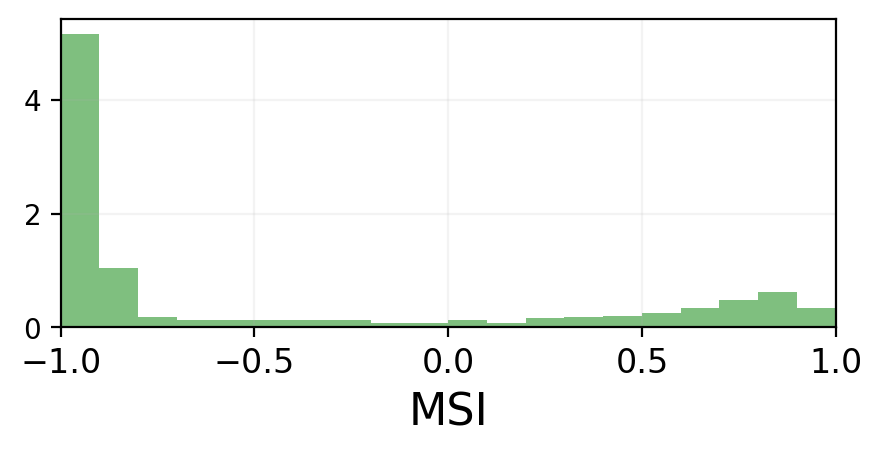

In [21]:
# Scores of the users
plt.figure(dpi = 200, figsize=(5,2))
plt.hist(score_users, bins = 20, range=(-1, 1), alpha = 0.50, color = 'g', density = True)
plt.xticks(np.arange(-1, 1.05, 0.50), size = 12)
plt.xlabel(r'MSI', size = 16)
plt.grid(True, alpha = 0.15)
plt.xlim([-1, 1])
plt.show()

In [22]:
user_media_df_filtrado['score'] = score_users

### EXPAND THIS TO USERS THAT SHARE ONE OF THE PRINCIPAL MEDIA

22805


In [14]:
# Scores of the media
media_score = []
for media in user_media_df_filtrado.columns[:user_media_df_filtrado.shape[1]-1]:
    media_score.append([media, np.average(user_media_df_filtrado['score'], weights=user_media_df_filtrado[media])])

AttributeError: 'int' object has no attribute 'columns'

In [ ]:
plt.figure(dpi = 200, figsize=(5,1))
plt.axes([0.15, 0.20, 0.70, 0.70])

for ms in media_score:
    plt.axvline(ms[1], color = 'grey')
plt.xticks([ms[1] for ms in media_score], [ms[0] for ms in media_score], rotation = 90)
plt.grid(True, alpha = 0.15)
plt.xlim([-1, 1])
plt.show()

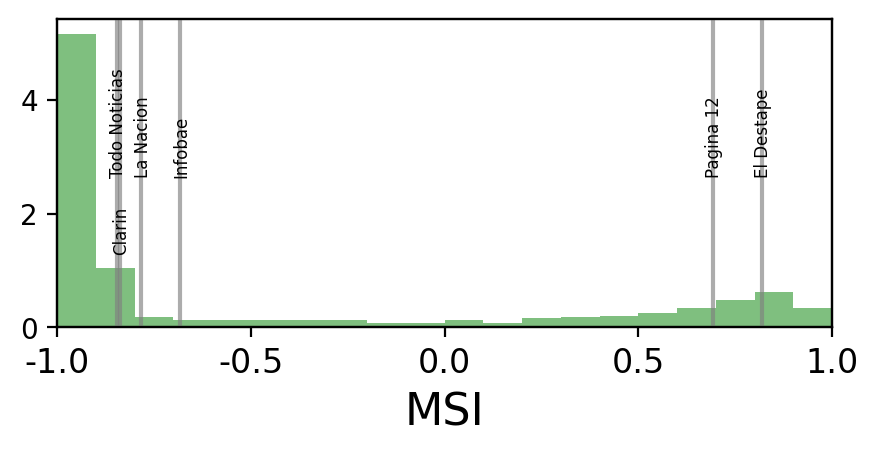

In [157]:
# Scores of the users
fig, ax = plt.subplots(dpi = 200, figsize=(5,2))
ax.hist(score_users, bins = 20, range=(-1, 1), alpha = 0.50, color = 'g', density = True)
ax.set_xlabel(r'MSI', size = 16)

ax2 = ax.twinx()
for ms in media_score:
    ax2.axvline(ms[1], color = 'grey', alpha = 0.65)
    if ms[0] != 'Clarin':
        ax2.text(x = ms[1]-0.02, y = 0.5, s=ms[0], rotation = 90, size = 6)
    else: 
        ax2.text(x = ms[1]-0.02, y = 0.25, s=ms[0], rotation = 90, size = 6)
ax2.set_yticks([])
ax.set_xticks(np.arange(-1, 1.05, 0.50), np.arange(-1, 1.05, 0.50), size = 12)
ax.set_xlim([-1, 1])
plt.show()

### Relation to opinion model 

The ideology of an user in the most frequent label assigned to it at the time of sharing a news.

In [103]:
from scipy.stats import mode 

In [104]:
user_ideology = data.groupby('usr_id').apply(lambda x: mode(x['opinion_dinamic'])[0][0])

/tmp/ipykernel_308940/1871124573.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  user_ideology = data.groupby('usr_id').apply(lambda x: mode(x['opinion_dinamic'])[0][0])
/tmp/ipykernel_308940/1871124573.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  user_ideology = data.groupby('usr_id').apply(lambda x: mode(x['opinion_dinamic'])[0][0])


In [105]:
ideology_of_msi_users = user_ideology[user_ideology.index.isin(user_media_df_filtrado.index)].to_list()

In [106]:
user_media_df_filtrado['ideology'] = ideology_of_msi_users

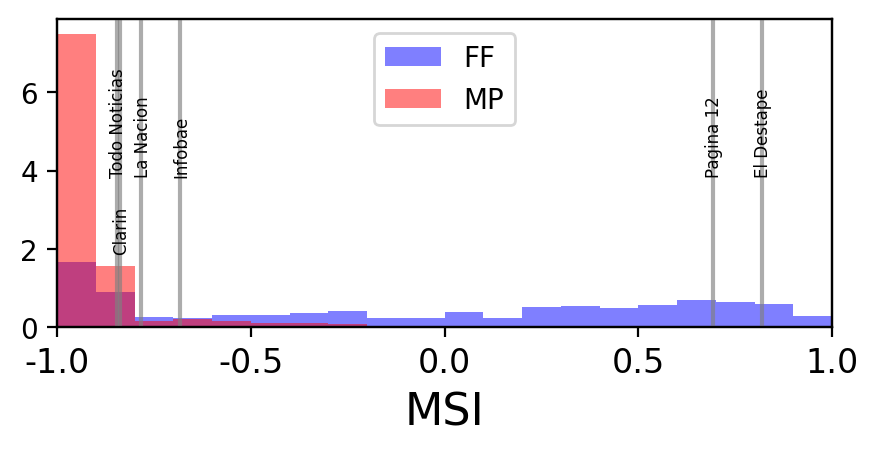

In [159]:
# Scores of the users
fig, ax = plt.subplots(dpi = 200, figsize=(5,2))

ideocolor = {'FF': 'b', 'MP': 'r'}
for ideology in ['FF', 'MP']:
    ax.hist(user_media_df_filtrado[user_media_df_filtrado['ideology'] == ideology]['score'], bins = 20, range=(-1, 1), alpha = 0.50, color = ideocolor[ideology], density = True, label = ideology)
ax.set_xlabel(r'MSI', size = 16)
ax.legend(loc = 'upper center')

ax2 = ax.twinx()
for ms in media_score:
    ax2.axvline(ms[1], color = 'grey', alpha = 0.65)
    if ms[0] != 'Clarin':
        ax2.text(x = ms[1]-0.02, y = 0.5, s=ms[0], rotation = 90, size = 6)
    else: 
        ax2.text(x = ms[1]-0.02, y = 0.25, s=ms[0], rotation = 90, size = 6)
ax2.set_yticks([])
    
    
ax2.set_yticks([])
ax.set_xticks(np.arange(-1, 1.05, 0.50), np.arange(-1, 1.05, 0.50), size = 12)
ax.set_xlim([-1, 1])
plt.show()